# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
 # Build query URL
# query_url = url + "appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city ## YOUR CODE HERE
    
#     print("URL:" + city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # YOUR CODE HERE
#         print(city_weather)
              
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE
        
        # Convert max temperature from Fahrenheit to Kelvin

        city_max_temp_F = (city_max_temp - 273.15) * 1.8 + 32
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_F,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | lichinga
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | karasburg
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | amos
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | teguise
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | minas de marcona
Processing Record 17 of Set 1 | labrador city
Processing Record 18 of Set 1 | nadi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | saint-laurent-de-la-salanque
Processing Record 22 of Set 

Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | kapa'a
Processing Record 41 of Set 4 | caleta de carquin
Processing Record 42 of Set 4 | jiangzi
Processing Record 43 of Set 4 | sinan
Processing Record 44 of Set 4 | mossel bay
Processing Record 45 of Set 4 | at taj
Processing Record 46 of Set 4 | happy valley-goose bay
Processing Record 47 of Set 4 | kone
Processing Record 48 of Set 4 | aibak
Processing Record 49 of Set 4 | alesund
Processing Record 0 of Set 5 | madinat ash shamal
Processing Record 1 of Set 5 | ar raqqah
Processing Record 2 of Set 5 | khash
Processing Record 3 of Set 5 | toga village
City not found. Skipping...
Processing Record 4 of Set 5 | socorro
Processing Record 5 of Set 5 | sarkand
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | pont rouge
Processing Record 8 of Set 5 | canarana
Processing Record 9 of Set 5 | whangarei
Processing Record 10 of Set 5 | laojunmiao
Processing Record 11 of Set 5 | rongelap
Processing Recor

Processing Record 32 of Set 8 | myitkyina
Processing Record 33 of Set 8 | makokou
Processing Record 34 of Set 8 | ojinaga
Processing Record 35 of Set 8 | idri
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | porto de moz
Processing Record 38 of Set 8 | xilin hot
Processing Record 39 of Set 8 | calvi
Processing Record 40 of Set 8 | bakchar
Processing Record 41 of Set 8 | dzhankoy
Processing Record 42 of Set 8 | palmer
Processing Record 43 of Set 8 | griffith
Processing Record 44 of Set 8 | mitsamiouli
Processing Record 45 of Set 8 | juhaynah
Processing Record 46 of Set 8 | montefiascone
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | esperantinopolis
Processing Record 49 of Set 8 | voghera
Processing Record 0 of Set 9 | chonchi
Processing Record 1 of Set 9 | atamyrat
Processing Record 2 of Set 9 | razole
Processing Record 3 of Set 9 | queenstown
Processing Record 4 of Set 9 | lompoc
Processing Record 5 of Set 9 | ahau
City not found. Sk

Processing Record 19 of Set 12 | bandarbeyla
Processing Record 20 of Set 12 | junction city
Processing Record 21 of Set 12 | hadibu
Processing Record 22 of Set 12 | brownfield
Processing Record 23 of Set 12 | kamina
Processing Record 24 of Set 12 | menongue
Processing Record 25 of Set 12 | turpan
Processing Record 26 of Set 12 | west frankfort
Processing Record 27 of Set 12 | kayyerkan
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | grand-lahou
Processing Record 30 of Set 12 | al hazm
Processing Record 31 of Set 12 | santana
Processing Record 32 of Set 12 | allende
Processing Record 33 of Set 12 | watsa
Processing Record 34 of Set 12 | al bawiti
Processing Record 35 of Set 12 | nacala
Processing Record 36 of Set 12 | singkil
Processing Record 37 of Set 12 | general jose de san martin
Processing Record 38 of Set 12 | hilo
Processing Record 39 of Set 12 | camacupa
Processing Record 40 of Set 12 | carpinteria
Processing Record 41 of Set 12 | juan griego
Process

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [12]:
# Display sample data
# city_data_df.head()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,36.014,67,100,1.54,US,1706648118
1,port mathurin,-19.6833,63.4167,81.446,77,100,8.93,MU,1706648118
2,ushuaia,-54.8000,-68.3000,60.458,55,75,3.60,AR,1706648118
3,lichinga,-13.3128,35.2406,68.090,83,40,3.09,MZ,1706648118
4,puerto ayora,-0.7393,-90.3518,87.764,78,87,5.25,EC,1706648118
...,...,...,...,...,...,...,...,...,...
570,thibodaux,29.7958,-90.8229,69.980,44,100,3.13,US,1706647923
571,itupiranga,-5.1347,-49.3267,88.124,92,96,0.38,BR,1706648212
572,pacific grove,36.6177,-121.9166,65.390,84,0,4.47,US,1706648212
573,yang talat,16.3998,103.3679,75.956,1,42,1.63,TH,1706648212


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data/cities.csv", index_label="City_ID")

# Output File (CSV)
output_data_cities = "..\output_data/cities.csv"


In [15]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,36.014,67,100,1.54,US,1706648118
1,port mathurin,-19.6833,63.4167,81.446,77,100,8.93,MU,1706648118
2,ushuaia,-54.8000,-68.3000,60.458,55,75,3.60,AR,1706648118
3,lichinga,-13.3128,35.2406,68.090,83,40,3.09,MZ,1706648118
4,puerto ayora,-0.7393,-90.3518,87.764,78,87,5.25,EC,1706648118


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

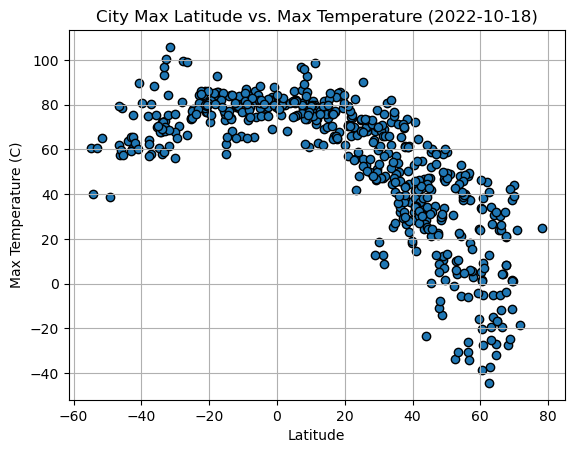

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor = 'black')
plt.title("City Max Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

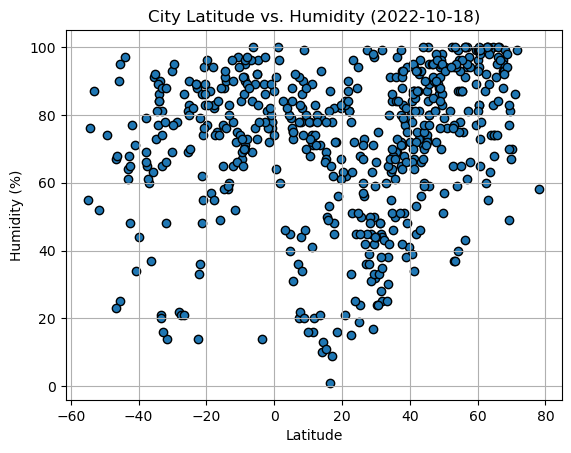

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolor = 'black')
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("..\output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

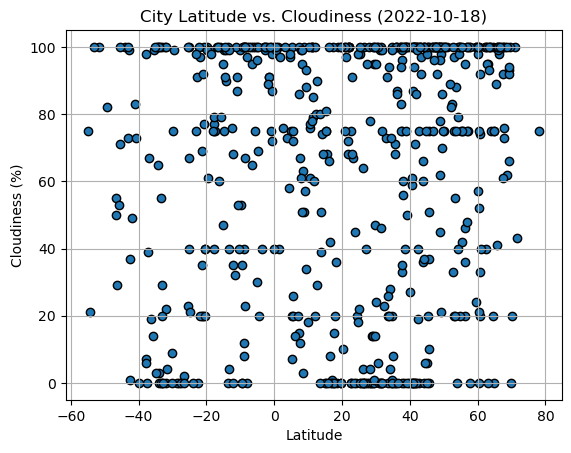

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor = 'black')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("..\output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

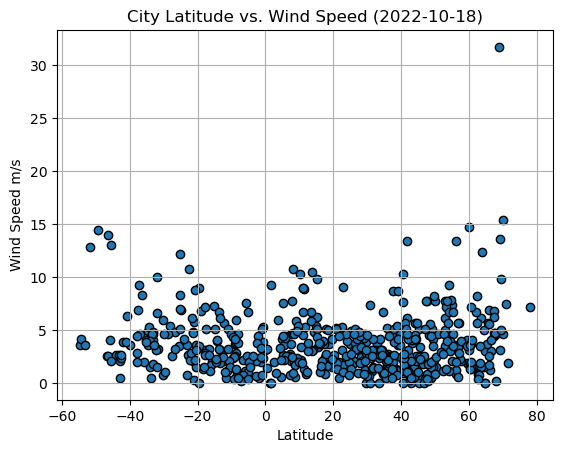

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor = 'black')
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.grid()
# Save the figure
plt.savefig("..\output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def f_linear_reg_plot(x_value,y_value,x_label,y_label,x_s,y_s):

# Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Line to plot   
#     plt.figure(figsize=(10,6))
    plt.scatter(x_value, y_value)
    plt.plot(x_value,regress_values,"r-") # regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_s,y_s),fontsize=12,color="red") #regression line label
    
    # correlation
    print(f"The r-value is : {st.pearsonr(x_value, y_value)[0]}") 
    plt.show() # Show the plot


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#create northern hemisphere dataframe
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,36.014,67,100,1.54,US,1706648118
8,amos,48.5669,-78.1162,29.930,86,100,4.50,CA,1706648119
10,iqaluit,63.7506,-68.5145,-5.314,63,100,6.17,CA,1706647984
11,teguise,29.0605,-13.5640,68.216,17,0,3.09,ES,1706648120
12,hamilton,39.1834,-84.5333,36.446,94,100,3.60,US,1706647961


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,81.446,77,100,8.93,MU,1706648118
2,ushuaia,-54.8000,-68.3000,60.458,55,75,3.60,AR,1706648118
3,lichinga,-13.3128,35.2406,68.090,83,40,3.09,MZ,1706648118
4,puerto ayora,-0.7393,-90.3518,87.764,78,87,5.25,EC,1706648118
5,karasburg,-28.0167,18.7500,81.338,22,0,5.39,NaN,1706648118


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.800470267898164


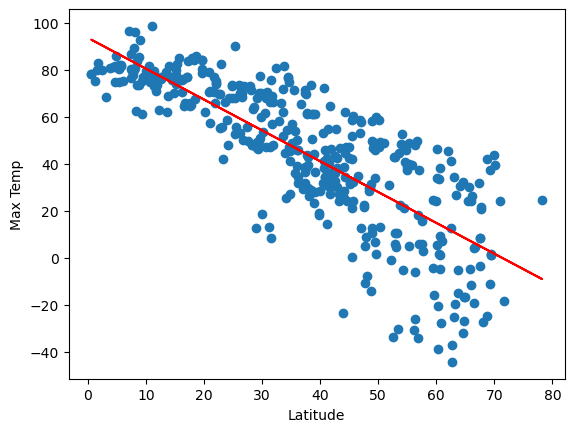

In [27]:
# Linear regression on Northern Hemisphere
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Max Temp']
f_linear_reg_plot(x_value, y_value, "Latitude", "Max Temp",2,240)


The r-value is : 0.48058337457321454


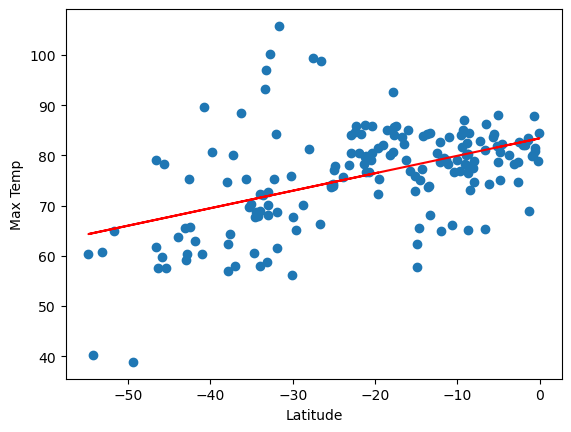

In [28]:
# Linear regression on Southern Hemisphere
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Max Temp']
f_linear_reg_plot(x_value, y_value, "Latitude", "Max Temp",-50,308)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.3925660143254456


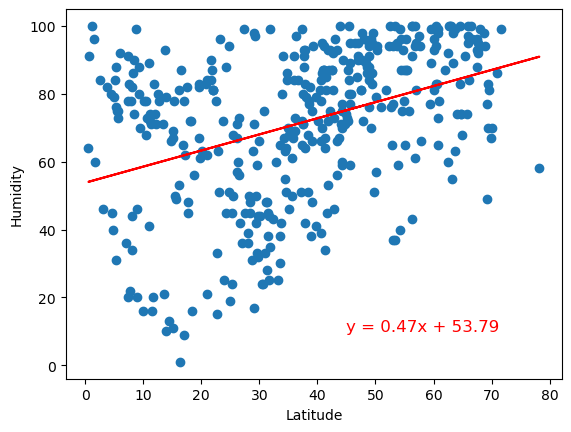

In [29]:
# Northern Hemisphere
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Humidity']
f_linear_reg_plot(x_value, y_value, "Latitude", "Humidity",45,10)

The r-value is : 0.29289084636861434


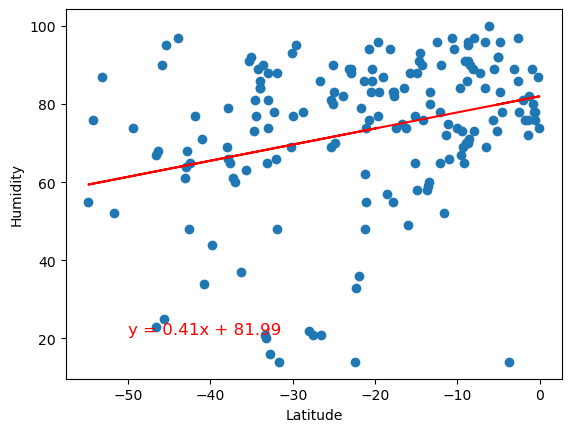

In [30]:
# Southern Hemisphere
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Humidity']
f_linear_reg_plot(x_value, y_value, "Latitude", "Humidity",-50,21)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.17556955499448312


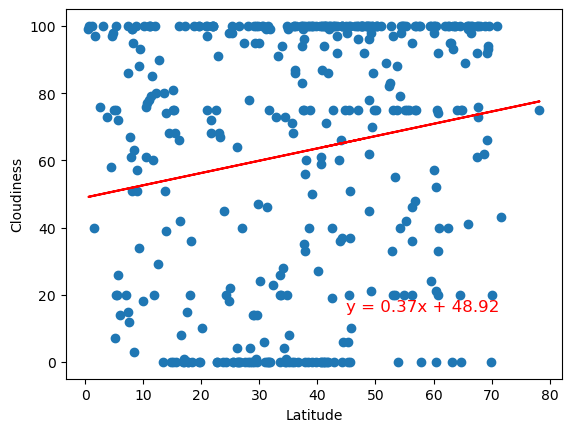

In [31]:
# Northern Hemisphere
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Cloudiness']
f_linear_reg_plot(x_value, y_value, "Latitude", "Cloudiness",45,15)


The r-value is : 0.23077965309545104


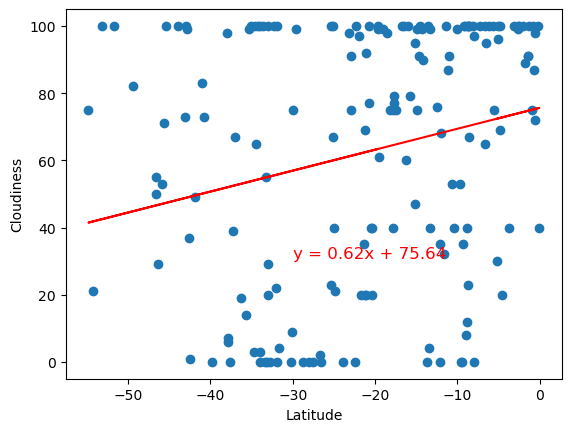

In [32]:
# Southern Hemisphere
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Cloudiness']
f_linear_reg_plot(x_value, y_value, "Latitude", "Cloudiness",-30,31)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.1217603943831179


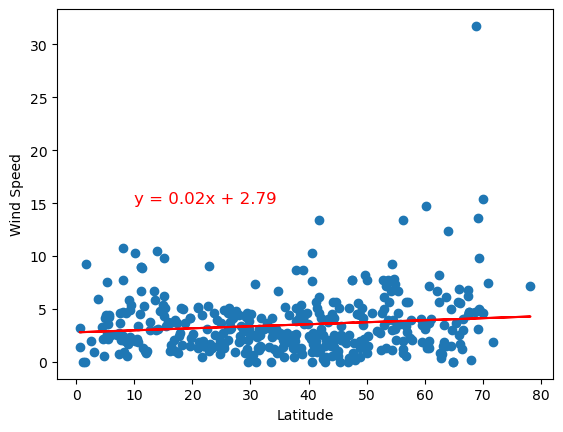

In [33]:
# Northern Hemisphere
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Wind Speed']
f_linear_reg_plot(x_value, y_value, "Latitude", "Wind Speed",10,15)

The r-value is : -0.32109846073337667


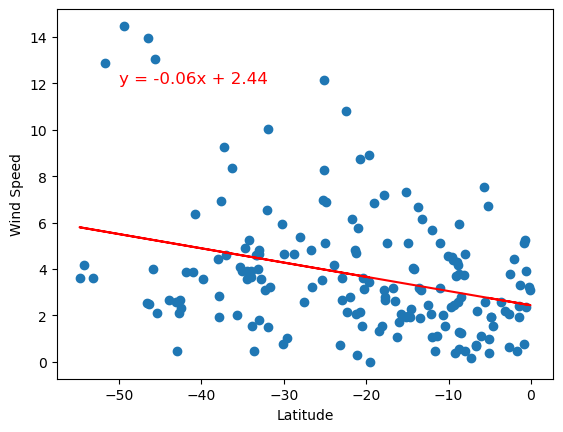

In [34]:
# Southern Hemisphere
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Wind Speed']
f_linear_reg_plot(x_value, y_value, "Latitude", "Wind Speed",-50,12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE